In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

#### regplot

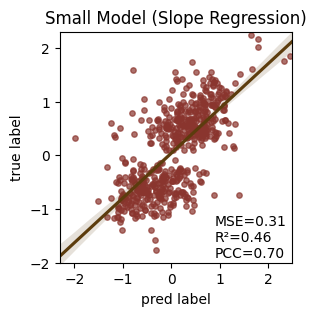

In [87]:
# load datasets
y_true = np.load('../model/pred_results_slope/small/label.npy')
y_pred = np.load('../model/pred_results_slope/small/predict.npy')

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
pcc = pearsonr(y_true, y_pred)[0]
pcc_pvalue = pearsonr(y_true, y_pred)[1]

ax = plt.subplots(figsize=(3,3))
plt.ylabel("true label")
plt.xlabel("pred label")
plt.xlim((-2.3, 2.5))
plt.ylim((-2, 2.3))
sns.regplot(x=y_pred,y=y_true,x_jitter = 0.15,y_jitter = 0.15,
            scatter_kws = {'color':'#8A352E','alpha':0.7,'s':15}, line_kws={"color": "#5C3C0D"},truncate=False)
plt.title('Small Model (Slope Regression)')

plt.text(0.9,-1.9,'MSE=%.2f\nR²=%.2f\nPCC=%.2f'%(mse,r2,pcc), fontsize=10)
plt.savefig('images/regression_performance/replot-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

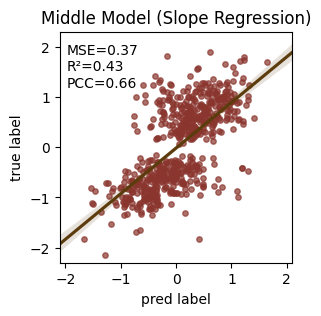

In [84]:
# load datasets
y_true = np.load('../model/pred_results_slope/middle/label.npy')[0:600]
y_pred = np.load('../model/pred_results_slope/middle/predict.npy')[0:600]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
pcc = pearsonr(y_true, y_pred)[0]
pcc_pvalue = pearsonr(y_true, y_pred)[ 1]

ax = plt.subplots(figsize=(3,3))
plt.ylabel("true label")
plt.xlabel("pred label")
plt.xlim((-2.1, 2.1))
plt.ylim((-2.3, 2.3))
sns.regplot(x=y_pred,y=y_true,x_jitter = 0.1,y_jitter = 0.1,
            scatter_kws = {'color':'#8A352E','alpha':0.7,'s':15}, line_kws={"color": "#5C3C0D"},truncate=False)
plt.title('Middle Model (Slope Regression)')
plt.text(-1.98,1.2,'MSE=%.2f\nR²=%.2f\nPCC=%.2f'%(mse,r2,pcc), fontsize=10)
plt.savefig('images/regression_performance/replot-middle.png',dpi=300, bbox_inches = 'tight')
plt.show()

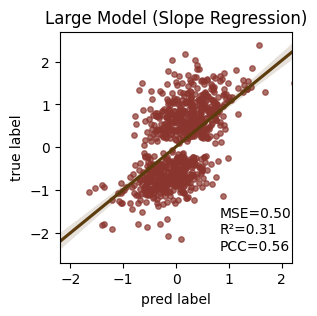

In [85]:
# load datasets
y_true = np.load('../model/pred_results_slope/large/label.npy')[0:800]
y_pred = np.load('../model/pred_results_slope/large/predict.npy')[0:800]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
pcc = pearsonr(y_true, y_pred)[0]
pcc_pvalue = pearsonr(y_true, y_pred)[1]

ax = plt.subplots(figsize=(3,3))
plt.ylabel("true label")
plt.xlabel("pred label")
plt.xlim((-2.2, 2.2))
plt.ylim((-2.7, 2.7))
sns.regplot(x=y_pred,y=y_true,x_jitter = 0.1,y_jitter = 0.1,
            scatter_kws = {'color':'#8A352E','alpha':0.7,'s':15}, line_kws={"color": "#5C3C0D"},truncate=False)
plt.title('Large Model (Slope Regression)')
plt.text(0.82,-2.4,'MSE=%.2f\nR²=%.2f\nPCC=%.2f'%(mse,r2,pcc), fontsize=10)
plt.savefig('images/regression_performance/replot-large.png',dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
# load datasets
y_true = np.load('../model/pred_results_slope/huge/label.npy')
y_pred = np.load('../model/pred_results_slope/huge/predict.npy')
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
pcc = pearsonr(y_true, y_pred)[0]
pcc_pvalue = pearsonr(y_true, y_pred)[1]

ax = plt.subplots(figsize=(3,3))
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=y_pred,y=y_true,x_jitter = 0.1,y_jitter = 0.1 ,
            scatter_kws = {'color':'#8A352E','alpha':0.7,'s':15}, line_kws={"color": "#5C3C0D"},truncate=False)
plt.title('Huge Model (Slope Regression)')
plt.text(0.9,-1.9,'MSE=%.2f\nR2=%.2f\nPCC=%.2f'%(mse,r2,pcc), fontsize=10)
plt.savefig('images/regression_performance/replot-huge.png',dpi=300, bbox_inches = 'tight')
plt.show()

#### raincloud

In [120]:
import matplotlib.collections as clt
import ptitprince as pt
import scipy.stats as stats

3.565454323211763e-06
2.683089599907963e-16


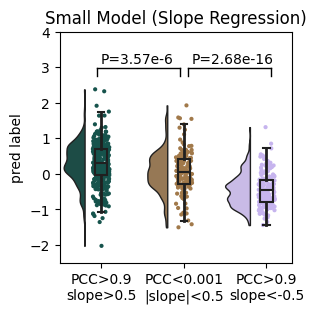

In [168]:
y_up = np.load('../model/pred_results_slope_compare_up/small/predict.npy')
y_down = np.load('../model/pred_results_slope_compare_down/small/predict.npy')
y = np.load('../model/pred_results_slope_compare/small/predict.npy')

df_up = pd.DataFrame(y_up, columns=['score'])
df_up['group'] = 'group1'
df_down = pd.DataFrame(y_down, columns=['score'])
df_down['group'] = 'group3'
df_y = pd.DataFrame(y, columns=['score'])
df_y['group'] = 'group2'
data = pd.concat([df_up,df_y,df_down])

y_max=2.5
y_min=-2.3

pvalue1 = stats.mannwhitneyu(df_up['score'].dropna(),df_y['score'])[1]
print(pvalue1)
pvalue2 = stats.mannwhitneyu(df_y['score'],df_down['score'])[1]
print(pvalue2)

dx="group"; dy="score"; ort="h"; pal="cubehelix"; sigma=.2
f, ax=plt.subplots(figsize=(3, 3))
plt.ylim((-2.5, 4))
pt.RainCloud(x=dx, y=dy, data=data, palette=pal, bw=sigma, box_sym='',
             width_viol = .6, ax = ax)

plt.plot([1+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([1+0.05,1+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([2+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 

plt.plot([0-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([0-0.05,0-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([1-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') \

plt.text(0,y_max+(y_max-y_min)/8,f'P=3.57e-6',fontsize=10,color='k')
plt.text(1.1,y_max+(y_max-y_min)/8,f'P=2.68e-16',fontsize=10,color='k')

plt.xlabel("")
plt.ylabel("pred label")
plt.xticks([0,1,2],['PCC>0.9\nslope>0.5','PCC<0.001\n|slope|<0.5','PCC>0.9\nslope<-0.5'])
plt.title('Small Model (Slope Regression)')
plt.savefig('images/regression_performance/raincloud-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

4.525432009314368e-07
1.5548629673225115e-15


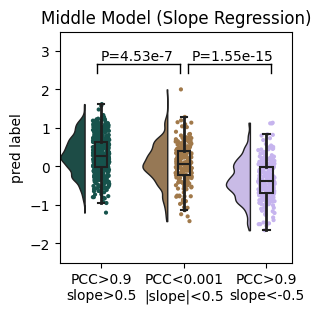

In [167]:
y_up = np.load('../model/pred_results_slope_compare_up/middle/predict.npy')
y_down = np.load('../model/pred_results_slope_compare_down/middle/predict.npy')
y = np.load('../model/pred_results_slope_compare/middle/predict.npy')[0:200]

df_up = pd.DataFrame(y_up, columns=['score'])
df_up['group'] = 'group1'
df_down = pd.DataFrame(y_down, columns=['score'])
df_down['group'] = 'group3'
df_y = pd.DataFrame(y, columns=['score'])
df_y['group'] = 'group2'
data = pd.concat([df_up,df_y,df_down])

y_max=2.2
y_min=-2.3
pvalue1 = stats.mannwhitneyu(df_up['score'].dropna(),df_y['score'].dropna())[1]
print(pvalue1)
pvalue2 = stats.mannwhitneyu(df_y['score'].dropna(),df_down['score'].dropna())[1]
print(pvalue2)

dx="group"; dy="score"; ort="h"; pal="cubehelix"; sigma=.2
f, ax=plt.subplots(figsize=(3, 3))
plt.ylim((-2.5, 3.5))
pt.RainCloud(x=dx, y=dy, data=data, palette=pal, bw=sigma, box_sym='',
             width_viol = .6, ax = ax)

plt.plot([1+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([1+0.05,1+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([2+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 

plt.plot([0-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([0-0.05,0-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([1-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') \

plt.text(0,y_max+(y_max-y_min)/8,f'P=4.53e-7',fontsize=10,color='k')
plt.text(1.1,y_max+(y_max-y_min)/8,f'P=1.55e-15',fontsize=10,color='k')

plt.xlabel("")
plt.ylabel("pred label")
plt.xticks([0,1,2],['PCC>0.9\nslope>0.5','PCC<0.001\n|slope|<0.5','PCC>0.9\nslope<-0.5'])
plt.title('Middle Model (Slope Regression)')
plt.savefig('images/regression_performance/raincloud-middle.png',dpi=300, bbox_inches = 'tight')
plt.show()

1.4994030684611149e-05
3.7544965579108687e-22


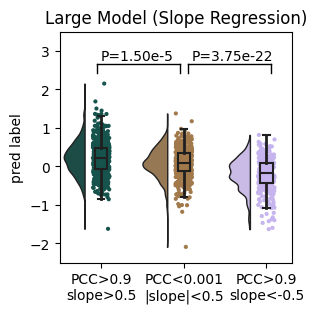

In [166]:
y_up = np.load('../model/pred_results_slope_compare_up/large/predict.npy')
y_down = np.load('../model/pred_results_slope_compare_down/large/predict.npy')
y = np.load('../model/pred_results_slope_compare/large/predict.npy')[0:500]

df_up = pd.DataFrame(y_up, columns=['score'])
df_up['group'] = 'group1'
df_down = pd.DataFrame(y_down, columns=['score'])
df_down['group'] = 'group3'
df_y = pd.DataFrame(y, columns=['score'])
df_y['group'] = 'group2'
data = pd.concat([df_up,df_y,df_down])

y_max=2.2
y_min=-2.3
pvalue1 = stats.mannwhitneyu(df_up['score'].dropna(),df_y['score'].dropna())[1]
print(pvalue1)
pvalue2 = stats.mannwhitneyu(df_y['score'].dropna(),df_down['score'].dropna())[1]
print(pvalue2)

dx="group"; dy="score"; ort="h"; pal="cubehelix"; sigma=.2
f, ax=plt.subplots(figsize=(3, 3))
plt.ylim((-2.5, 3.5))
pt.RainCloud(x=dx, y=dy, data=data, palette=pal, bw=sigma, box_sym='',
             width_viol = .6, ax = ax)

plt.plot([1+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([1+0.05,1+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([2+0.05,2+0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 

plt.plot([0-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10], linewidth=1, color='k') 
plt.plot([0-0.05,0-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') 
plt.plot([1-0.05,1-0.05], [y_max+(y_max-y_min)/10,y_max+(y_max-y_min)/10-(y_max-y_min)/20], linewidth=1, color='k') \

plt.text(0,y_max+(y_max-y_min)/8,f'P=1.50e-5',fontsize=10,color='k')
plt.text(1.1,y_max+(y_max-y_min)/8,f'P=3.75e-22',fontsize=10,color='k')

plt.xlabel("")
plt.ylabel("pred label")
plt.xticks([0,1,2],['PCC>0.9\nslope>0.5','PCC<0.001\n|slope|<0.5','PCC>0.9\nslope<-0.5'])
plt.title('Large Model (Slope Regression)')
plt.savefig('images/regression_performance/raincloud-large.png',dpi=300, bbox_inches = 'tight')
plt.show()